# IPL Dataset ball-by-ball data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import math
from scipy.stats import pearsonr

In [2]:
#ACCESS DATASET FROM GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/IPL Ball-by-Ball 2008-2020.csv")
df.head()

Mounted at /content/drive


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [3]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [4]:
df.shape

(193468, 18)

In [5]:
df.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [7]:
# int, float and boolean data
print(df.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(df.count(numeric_only=True)))

id              193468
inning          193468
over            193468
ball            193468
batsman_runs    193468
extra_runs      193468
total_runs      193468
non_boundary    193468
is_wicket       193468
dtype: int64
Total No. of Numerical Columns: 9


In [8]:
df.describe(include='all')

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468,193468,193468,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,9495,9495,6784,10233,193468,193277
unique,NaN,NaN,NaN,NaN,537,530,420,NaN,NaN,NaN,NaN,NaN,9,506,879,5,15,15
top,NaN,NaN,NaN,NaN,V Kohli,S Dhawan,Harbhajan Singh,NaN,NaN,NaN,NaN,NaN,caught,RG Sharma,MS Dhoni,wides,Mumbai Indians,Mumbai Indians
freq,NaN,NaN,NaN,NaN,4609,4593,3451,NaN,NaN,NaN,NaN,NaN,5743,167,164,5858,24466,24453
mean,7.567688e+05,1.482131,9.177027,3.615967,NaN,NaN,NaN,1.240231,0.066414,1.306645,0.000083,0.049078,NaN,NaN,NaN,NaN,NaN,NaN
std,3.060971e+05,0.499682,5.676848,1.807128,NaN,NaN,NaN,1.610867,0.339991,1.598802,0.009094,0.216031,NaN,NaN,NaN,NaN,NaN,NaN
min,3.359820e+05,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.012270e+05,1.000000,4.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.292970e+05,1.000000,9.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.082628e+06,2.000000,14.000000,5.000000,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_runrate = df.groupby('over').agg({'id': 'nunique','total_runs' : 'sum'}).reset_index()

In [10]:
df_runrate

,over,id,total_runs
0,0,816,9804
1,1,816,11642
2,2,816,13005
3,3,816,13348
4,4,816,13405
5,5,815,13470
6,6,815,10840
7,7,815,11548
8,8,814,11999
9,9,814,11875


<Axes: xlabel='over', ylabel='total_runs'>

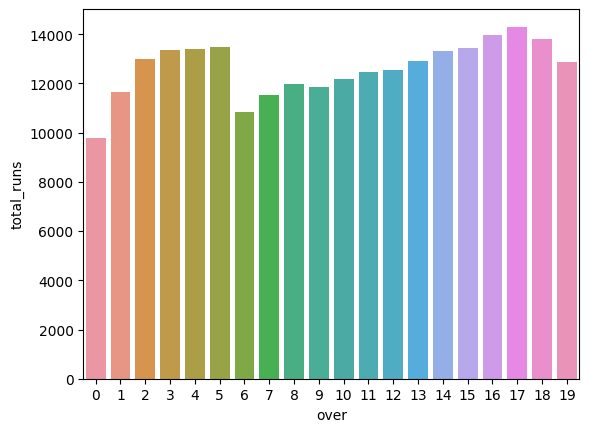

In [11]:
sbn.barplot(x="over", y="total_runs", data=df_runrate)

In [12]:
inoverdist_df = df.groupby('ball').agg({'id' : 'nunique', 'total_runs' : 'sum'}).reset_index()
inoverdist_df

,ball,id,total_runs
0,1,816,39664
1,2,816,40759
2,3,816,41268
3,4,816,41521
4,5,816,40854
5,6,816,39997
6,7,814,7475
7,8,520,1115
8,9,123,141


<Axes: xlabel='ball', ylabel='total_runs'>

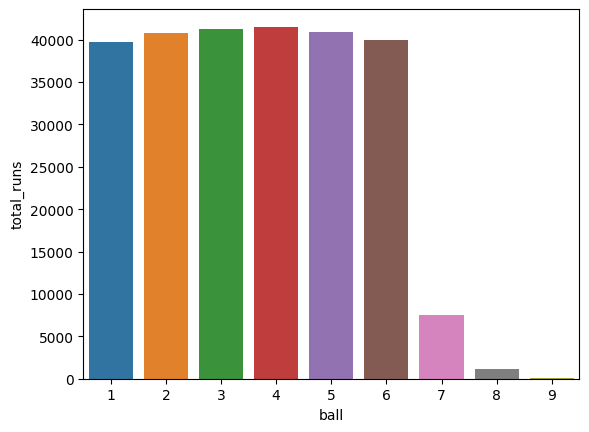

In [13]:
sbn.barplot(x="ball", y="total_runs", data=inoverdist_df)

In [14]:
df_wicket_over = df.groupby('over').agg({'id':'nunique','is_wicket':'sum'}).reset_index()
df_wicket_over

,over,id,is_wicket
0,0,816,318
1,1,816,378
2,2,816,403
3,3,816,412
4,4,816,416
5,5,815,405
6,6,815,327
7,7,815,347
8,8,814,393
9,9,814,361


<Axes: xlabel='over', ylabel='is_wicket'>

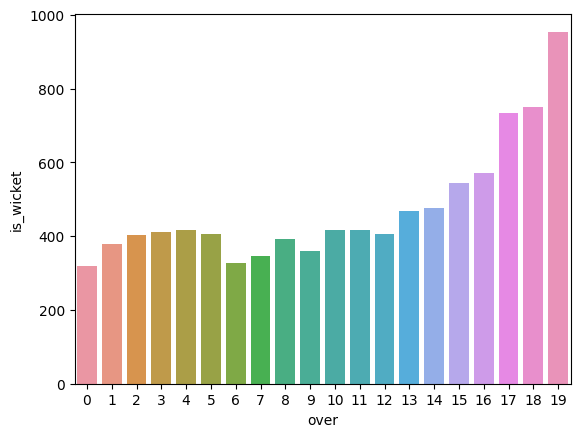

In [15]:
sbn.barplot(x="over", y="is_wicket", data=df_wicket_over)

In [16]:
df['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

# **Season wise Analysis of 4s and 6s**

In [17]:
df_6s_permatch = df[(df['batsman_runs']==6)&(df['non_boundary']==0)].groupby('id').count()\
                      .reset_index()\
                      .sort_values('id')


df_6s_permatch = df_6s_permatch.loc[:,["id", "inning"]]
df_6s_permatch.columns = ["match_id", "6s"]
df_6s_permatch

,match_id,6s
0,335982,17
1,335983,25
2,335984,4
3,335985,11
4,335986,10
...,...,...
811,1216547,26
812,1237177,18
813,1237178,4
814,1237180,13


In [18]:
df_6s_permatch.shape

(816, 2)

In [19]:
k=0
season_6 = [0]*13

for i in range(df_6s_permatch.shape[0]-1):
  a = df_6s_permatch.match_id[i]
  b = df_6s_permatch.match_id[i+1]

  if b-a<21000:
    season_6[k] += df_6s_permatch['6s'][i]

  else:
    k+=1

print(season_6)

[610, 497, 572, 622, 717, 665, 693, 674, 615, 698, 853, 769, 723]


In [20]:
df_6s_permatch['6s']

0      17
1      25
2       4
3      11
4      10
       ..
811    26
812    18
813     4
814    13
815    11
Name: 6s, Length: 816, dtype: int64

In [21]:
df_4s_permatch = df[(df['batsman_runs']==4)&(df['non_boundary']==0)].groupby('id').count()\
            .reset_index()\
            .sort_values('id')


df_4s_permatch = df_4s_permatch.loc[:,["id", "inning"]]
df_4s_permatch.columns = ["match_id", "4s"]
df_4s_permatch

,match_id,4s
0,335982,18
1,335983,38
2,335984,32
3,335985,33
4,335986,11
...,...,...
811,1216547,23
812,1237177,28
813,1237178,21
814,1237180,28


In [22]:
k=0
season_4 = [0]*13

for i in range(df_4s_permatch.shape[0]-1):
  a = df_4s_permatch.match_id[i]
  b = df_4s_permatch.match_id[i+1]

  if b-a<21000:
    season_4[k] += df_4s_permatch['4s'][i]

  else:
    k+=1

print(season_4)

[1682, 1297, 1685, 1895, 1880, 2025, 1530, 1575, 1600, 1592, 1622, 1633, 1553]


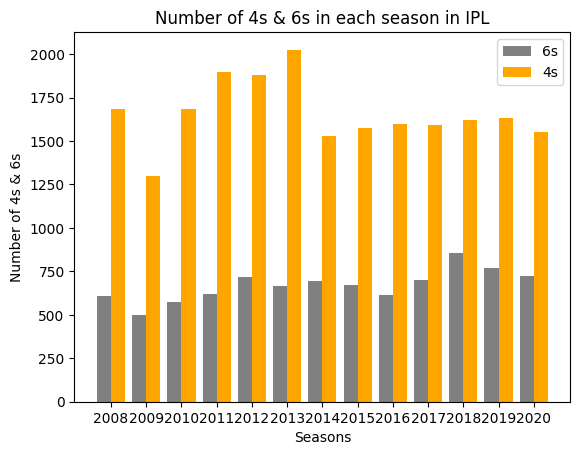

In [23]:
X = ['2008','2009','2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, season_6, 0.4, label = '6s', color='grey')
plt.bar(X_axis + 0.2, season_4, 0.4, label = '4s', color='Orange')

plt.xticks(X_axis, X)
plt.xlabel("Seasons")
plt.ylabel("Number of 4s & 6s")
plt.title("Number of 4s & 6s in each season in IPL")
plt.legend()
plt.show()

# 2. (T0) List data preprocessing, and normalization/standardization techniques that should be the most suitable to the dataset.

In [24]:
df_batsman_data = df.groupby('batsman')\
            .agg({'id':'nunique','is_wicket':'sum','batsman_runs':'sum'})\
            .reset_index()
df_batsman_data.columns = ['player', 'batting_innings','dismissals','scored_runs']
df_batsman_data

,player,batting_innings,dismissals,scored_runs
0,A Ashish Reddy,23,15,280
1,A Chandila,2,1,4
2,A Chopra,6,5,53
3,A Choudhary,3,2,25
4,A Dananjaya,1,0,4
...,...,...,...,...
532,YV Takawale,10,8,192
533,Yashpal Singh,4,4,47
534,Younis Khan,1,1,3
535,Yuvraj Singh,126,109,2750


In [25]:
df_batsman_sixes = df[(df['batsman_runs']==6)&(df['non_boundary']==0)]\
            .groupby('batsman')['id']\
            .count()\
            .reset_index()\
            .sort_values('id')
df_batsman_sixes.columns = ['player','sixes']
df_batsman_sixes

,player,sixes
146,KB Arun Karthik,1
210,Mohammed Siraj,1
283,SD Lad,1
287,SK Trivedi,1
56,Basil Thampi,1
...,...,...
332,V Kohli,201
251,RG Sharma,213
202,MS Dhoni,216
11,AB de Villiers,235


In [26]:
df_batsman_fours = df[(df['batsman_runs']==4)&(df['non_boundary']==0)]\
            .groupby('batsman')['id']\
            .count()\
            .reset_index()\
            .sort_values('id')
df_batsman_fours.columns = ['player','fours']
df_batsman_fours

,player,fours
124,GB Hogg,1
214,M Muralitharan,1
115,DT Patil,1
347,SD Lad,1
110,DR Martyn,1
...,...,...
123,G Gambhir,492
350,SK Raina,493
400,V Kohli,503
91,DA Warner,510


In [27]:
df_batsman_balls = df[(df['extras_type']!='wides')]\
                    .groupby('batsman')['id']\
                    .count()\
                    .reset_index()\
                    .sort_values('id',ascending=False)
df_batsman_balls.columns = ['player','faced_balls']
df_batsman_balls

,player,faced_balls
505,V Kohli,4496
407,S Dhawan,4096
379,RG Sharma,4004
438,SK Raina,3914
116,DA Warner,3712
...,...,...
499,U Kaul,1
204,JL Denly,1
469,Shahbaz Ahmed,1
136,DP Vijaykumar,1


In [28]:
df_batsman_permatch = df.groupby(['batsman','id'])['batsman_runs'].sum().reset_index()
df_batsman_permatch



,batsman,id,batsman_runs
0,A Ashish Reddy,548346,10
1,A Ashish Reddy,548352,3
2,A Ashish Reddy,548359,8
3,A Ashish Reddy,548373,10
4,A Ashish Reddy,548376,4
...,...,...,...
12157,Z Khan,980903,4
12158,Z Khan,980993,2
12159,Z Khan,1082595,1
12160,Z Khan,1082635,2


In [29]:
df_batsman_highscore = df_batsman_permatch.groupby(['batsman'])['batsman_runs']\
                          .max()\
                          .reset_index()\
                          .sort_values('batsman_runs',ascending=False)
df_batsman_highscore.columns = ['player','high_score']
df_batsman_highscore

,player,high_score
96,CH Gayle,175
77,BB McCullum,158
24,AB de Villiers,133
232,KL Rahul,132
388,RR Pant,128
...,...,...
91,C Nanda,0
457,SS Cottrell,0
64,Arshdeep Singh,0
58,Abdur Razzak,0


In [30]:
df_batsman_fifties = df_batsman_permatch[(df_batsman_permatch['batsman_runs']>=50)&(df_batsman_permatch['batsman_runs']<100)]\
        .groupby('batsman')['batsman_runs']\
        .count()\
        .reset_index()\
        .sort_values('batsman_runs',ascending=False)
df_batsman_fifties.columns = ['player','fifties']
df_batsman_fifties

,player,fifties
26,DA Warner,48
117,S Dhawan,41
109,RG Sharma,39
147,V Kohli,39
2,AB de Villiers,38
...,...,...
1,AA Jhunjhunwala,1
127,SN Khan,1
128,SO Hetmyer,1
129,SP Goswami,1


In [31]:
df_batsman_centuries = df_batsman_permatch[df_batsman_permatch['batsman_runs']>=100]\
        .groupby('batsman')['batsman_runs']\
        .count()\
        .reset_index()\
        .sort_values('batsman_runs',ascending=False)
df_batsman_centuries.columns = ['player','centuries']
df_batsman_centuries

,player,centuries
7,CH Gayle,6
32,V Kohli,5
9,DA Warner,4
29,SR Watson,4
1,AB de Villiers,3
11,HM Amla,2
16,M Vijay,2
13,KL Rahul,2
31,SV Samson,2
24,S Dhawan,2


In [32]:
df_batsman_data = df_batsman_data.merge(df_batsman_sixes, on='player',how='outer').merge(df_batsman_fours, on='player',how='outer')\
                     .merge(df_batsman_balls, on='player',how='outer').merge(df_batsman_highscore, on='player',how='outer')\
                     .merge(df_batsman_centuries, on='player',how='outer').merge(df_batsman_fifties, on='player',how='outer')
df_batsman_data

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties
0,A Ashish Reddy,23,15,280,15.0,16.0,193,36,NaN,NaN
1,A Chandila,2,1,4,NaN,NaN,7,4,NaN,NaN
2,A Chopra,6,5,53,NaN,7.0,71,24,NaN,NaN
3,A Choudhary,3,2,25,1.0,1.0,20,15,NaN,NaN
4,A Dananjaya,1,0,4,NaN,NaN,5,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
532,YV Takawale,10,8,192,3.0,26.0,178,45,NaN,NaN
533,Yashpal Singh,4,4,47,NaN,5.0,66,20,NaN,NaN
534,Younis Khan,1,1,3,NaN,NaN,7,3,NaN,NaN
535,Yuvraj Singh,126,109,2750,149.0,217.0,2120,83,NaN,13.0


In [33]:
df['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'Type of Dismissal')

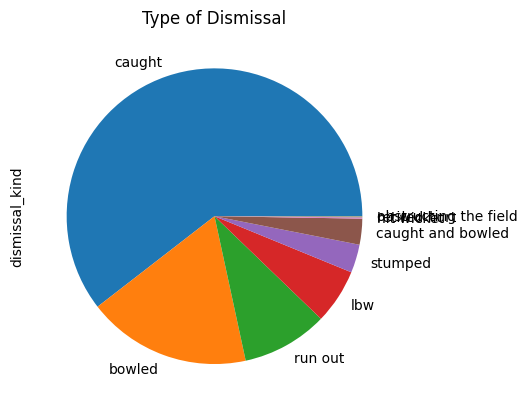

In [34]:
df['dismissal_kind'].value_counts().plot.pie()
plt.title("Type of Dismissal")

# Maximum number of players were dismissed as they were caught.


In [35]:
df_batsman_data['batting_strikerate'] = (df_batsman_data['scored_runs']/df_batsman_data['faced_balls'])*100
df_batsman_data['batting_avg'] = df_batsman_data['scored_runs']/df_batsman_data['dismissals']

df_batsman_data.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg
0,A Ashish Reddy,23,15,280,15.0,16.0,193,36,NaN,NaN,145.077720,18.666667
1,A Chandila,2,1,4,NaN,NaN,7,4,NaN,NaN,57.142857,4.000000
2,A Chopra,6,5,53,NaN,7.0,71,24,NaN,NaN,74.647887,10.600000
3,A Choudhary,3,2,25,1.0,1.0,20,15,NaN,NaN,125.000000,12.500000
4,A Dananjaya,1,0,4,NaN,NaN,5,4,NaN,NaN,80.000000,inf


In [36]:
# Replacing NaN values with 0
df_batsman_data.fillna(0, inplace=True)

# sorting dataframe with respect to scored_runs
df_batsman_data = df_batsman_data.sort_values(by='scored_runs', ascending=False)
df_batsman_data.head()

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg
505,V Kohli,184,163,5878,201.0,503.0,4496,113,5.0,39.0,130.738434,36.061350
438,SK Raina,189,160,5368,194.0,493.0,3914,100,1.0,38.0,137.148697,33.550000
116,DA Warner,142,126,5254,195.0,510.0,3712,126,4.0,48.0,141.540948,41.698413
379,RG Sharma,194,177,5230,213.0,458.0,4004,109,1.0,39.0,130.619381,29.548023
407,S Dhawan,175,152,5197,108.0,591.0,4096,106,2.0,41.0,126.879883,34.190789


In [37]:
df_bowler_data = df[(df['dismissal_kind']!='run out')&(df['dismissal_kind']!='obstructing the field')&(df['dismissal_kind']!='retired hurt')]
df_bowler_data = df_bowler_data.groupby('bowler').agg({'id':'nunique','total_runs':'sum','is_wicket':'sum'}).reset_index()
df_bowler_data.columns = ['player', 'bowling_innings', 'runs_conceded', 'wickets_taken']
df_bowler_data

,player,bowling_innings,runs_conceded,wickets_taken
0,A Ashish Reddy,20,400,18
1,A Chandila,12,245,11
2,A Choudhary,5,144,5
3,A Dananjaya,1,47,0
4,A Flintoff,3,106,2
...,...,...,...,...
415,YA Abdulla,11,311,15
416,YK Pathan,82,1440,42
417,YS Chahal,98,2782,121
418,Yuvraj Singh,73,1090,36


In [38]:
df_balls_bowled = df[(df['extras_type']!='wides')&(df['extras_type']!='noballs')]\
                  .groupby('bowler')['id']\
                  .count().reset_index()
df_balls_bowled.columns = ['player','bowled_balls']
df_balls_bowled

,player,bowled_balls
0,A Ashish Reddy,262
1,A Chandila,234
2,A Choudhary,101
3,A Dananjaya,24
4,A Flintoff,66
...,...,...
415,YA Abdulla,209
416,YK Pathan,1147
417,YS Chahal,2130
418,Yuvraj Singh,869


A bowling spell is a sequence of overs bowled by a single bowler, and it is often evaluated based on various factors

In [39]:
df_bowler_permatch = df[(df['dismissal_kind']!='run out')&(df['dismissal_kind']!='obstructing the field')&(df['dismissal_kind']!='retired hurt')]
df_bowler_permatch = df_bowler_permatch.groupby(['bowler','id'])['is_wicket'].sum().reset_index()

df_bowler_bestspell = df_bowler_permatch.groupby(['bowler'])['is_wicket'].max().reset_index()
df_bowler_bestspell.columns = ['player','best_spell']
df_bowler_bestspell

,player,best_spell
0,A Ashish Reddy,3
1,A Chandila,4
2,A Choudhary,2
3,A Dananjaya,0
4,A Flintoff,1
...,...,...
415,YA Abdulla,4
416,YK Pathan,3
417,YS Chahal,4
418,Yuvraj Singh,4


In [40]:
df_bowler_4wh = df_bowler_permatch[(df_bowler_permatch['is_wicket']==4)]\
        .groupby('bowler')['is_wicket']\
        .count()\
        .reset_index()\
        .sort_values('is_wicket',ascending=False)
df_bowler_4wh.columns = ['player','4W']
df_bowler_4wh

,player,4W
73,SP Narine,6
71,SL Malinga,6
29,K Rabada,4
2,A Mishra,3
60,RA Jadeja,3
...,...,...
32,KP Appanna,1
31,KK Cooper,1
30,KA Pollard,1
28,JP Duminy,1


In [41]:
df_bowler_5wh = df_bowler_permatch[(df_bowler_permatch['is_wicket']>=5)]\
        .groupby('bowler')['is_wicket']\
        .count()\
        .reset_index()\
        .sort_values('is_wicket',ascending=False)
df_bowler_5wh.columns = ['player','5W']

df_bowler_5wh

,player,5W
12,JP Faulkner,2
11,JD Unadkat,2
0,A Kumble,1
10,I Sharma,1
17,SP Narine,1
16,SL Malinga,1
15,RA Jadeja,1
14,MM Patel,1
13,L Balaji,1
9,Harbhajan Singh,1


In [42]:
df_bowler_6wh = df_bowler_permatch[(df_bowler_permatch['is_wicket']>=6)]\
        .groupby('bowler')['is_wicket']\
        .count()\
        .reset_index()\
        .sort_values('is_wicket',ascending=False)
df_bowler_6wh.columns = ['player','6W']

df_bowler_6wh

,player,6W
0,A Zampa,1
1,AS Joseph,1
2,Sohail Tanvir,1


In [43]:
df_bowler_data = df_bowler_data.merge(df_balls_bowled, on='player',how='outer')\
                  .merge(df_bowler_bestspell, on='player',how='outer')\
                  .merge(df_bowler_4wh, on='player',how='outer')\
                  .merge(df_bowler_5wh, on='player',how='outer')
df_bowler_data

,player,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W
0,A Ashish Reddy,20,400,18,262,3,NaN,NaN
1,A Chandila,12,245,11,234,4,1.0,NaN
2,A Choudhary,5,144,5,101,2,NaN,NaN
3,A Dananjaya,1,47,0,24,0,NaN,NaN
4,A Flintoff,3,106,2,66,1,NaN,NaN
...,...,...,...,...,...,...,...,...
415,YA Abdulla,11,311,15,209,4,2.0,NaN
416,YK Pathan,82,1440,42,1147,3,NaN,NaN
417,YS Chahal,98,2782,121,2130,4,2.0,NaN
418,Yuvraj Singh,73,1090,36,869,4,2.0,NaN


In [44]:
wickets = df.query('(is_wicket!=0) and (dismissal_kind in ["caught", "bowled", "lbw", "stumped", "caught and bowled", "hit wicket"])')
top_wickets = wickets.groupby(['bowler'])[['is_wicket']].count().sort_values(by='is_wicket', ascending=False).rename(columns={'is_wicket':'total_wickets_taken'}).reset_index()

bowl_inning = []
overs_bowled = []
runs_conceded = []

for bowler in top_wickets.bowler:
  inn_bowl = df[df['bowler']=='Bowler'].id.nunique()
  bowl_inning.append(inn_bowl)
  overs = round(df.loc[(df['bowler']==bowler) & (df['extras_type'] != 'wides') & (df['extras_type'] != 'noballs') & (df['extras_type'] != 'penalty')].shape[0]/6,2)
  overs_bowled.append(overs)
  runs = df.loc[(df['bowler']==bowler) & (df['extras_type'] != 'byes') & (df['extras_type'] != 'legbyes') & (df['extras_type'] != 'penalty') ].total_runs.sum()
  runs_conceded.append(runs)

top_wickets['no_of_innings'] = bowl_inning
top_wickets['overs_bowled'] = overs_bowled
top_wickets['runs_conceded']= runs_conceded
top_wickets['average'] = round(top_wickets['runs_conceded']/top_wickets['total_wickets_taken'],2)
top_wickets['ECONOMY'] = round(top_wickets['runs_conceded']/top_wickets['overs_bowled'],2)
top_wickets['strike_rate'] = round((top_wickets['overs_bowled']*6)/top_wickets['total_wickets_taken'],2)

top_20_wicket = top_wickets.head(20)

pd.set_option('display.max_rows', 20)
top_wickets.head(20)

,bowler,total_wickets_taken,no_of_innings,overs_bowled,runs_conceded,average,ECONOMY,strike_rate
0,SL Malinga,170,0,471.17,3363,19.78,7.14,16.63
1,A Mishra,160,0,526.83,3867,24.17,7.34,19.76
2,PP Chawla,156,0,541.67,4263,27.33,7.87,20.83
3,DJ Bravo,153,0,452.00,3798,24.82,8.40,17.73
4,Harbhajan Singh,150,0,562.33,3967,26.45,7.05,22.49
5,R Ashwin,138,0,538.33,3700,26.81,6.87,23.41
6,B Kumar,136,0,449.50,3253,23.92,7.24,19.83
7,SP Narine,127,0,464.17,3147,24.78,6.78,21.93
8,YS Chahal,121,0,355.00,2723,22.50,7.67,17.60
9,UT Yadav,119,0,420.50,3578,30.07,8.51,21.20


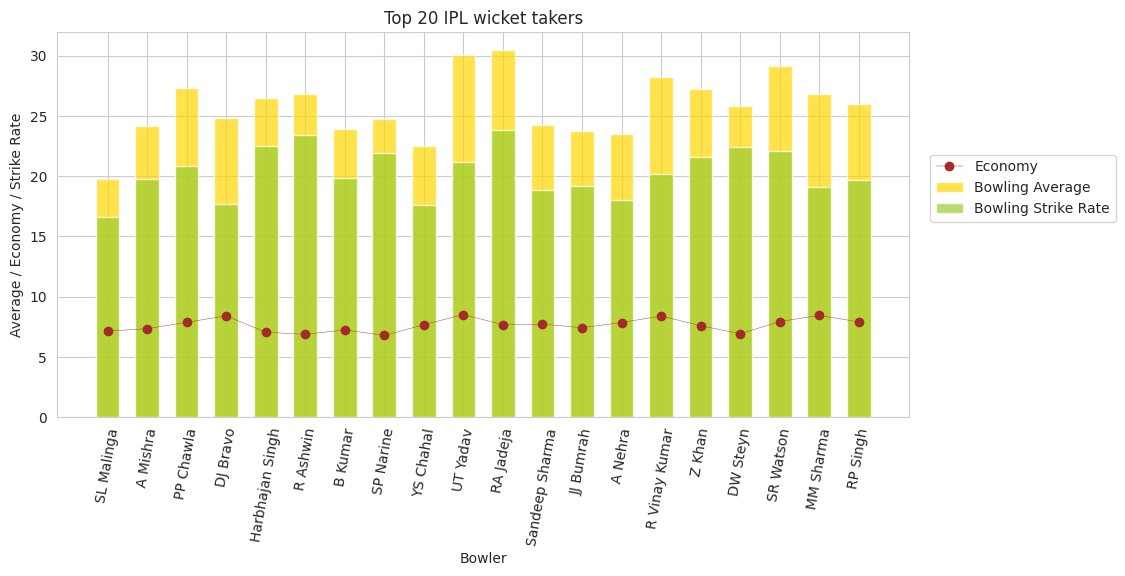

In [45]:
#Plotting the graph
import seaborn as sns

plt.figure(figsize=(11,5))
sns.set_style('whitegrid')
plt.bar(top_20_wicket.bowler, top_20_wicket.average, color='gold', width=0.6, alpha=0.7)
plt.bar(top_20_wicket.bowler, top_20_wicket.strike_rate, color='yellowgreen', width=0.6, alpha=0.7)
plt.plot(top_20_wicket.bowler, top_20_wicket.ECONOMY, color='brown', marker='o', linewidth=0.3, markersize=6)
plt.xlabel('Bowler')
plt.ylabel('Average / Economy / Strike Rate')
plt.xticks(rotation=80)
plt.legend(['Economy', 'Bowling Average', 'Bowling Strike Rate'], bbox_to_anchor=(1.25, 0.7))
plt.title("Top 20 IPL wicket takers")
plt.show()
plt.close()

In [46]:
df_player_data = df_batsman_data.merge(df_bowler_data, on='player', how='outer')

In [47]:
# Replacing NaN values with 0
df_player_data.fillna(0, inplace=True)

df_player_data

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W
0,V Kohli,184.0,163.0,5878.0,201.0,503.0,4496.0,113.0,5.0,39.0,130.738434,36.061350,26.0,370.0,4.0,251.0,2.0,0.0,0.0
1,SK Raina,189.0,160.0,5368.0,194.0,493.0,3914.0,100.0,1.0,38.0,137.148697,33.550000,69.0,1137.0,25.0,908.0,2.0,0.0,0.0
2,DA Warner,142.0,126.0,5254.0,195.0,510.0,3712.0,126.0,4.0,48.0,141.540948,41.698413,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,RG Sharma,194.0,177.0,5230.0,213.0,458.0,4004.0,109.0,1.0,39.0,130.619381,29.548023,30.0,448.0,15.0,332.0,4.0,1.0,0.0
4,S Dhawan,175.0,152.0,5197.0,108.0,591.0,4096.0,106.0,2.0,41.0,126.879883,34.190789,6.0,72.0,4.0,48.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,SS Mundhe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,6.0,1.0,6.0,1.0,0.0,0.0
576,SS Sarkar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.0,34.0,1.0,25.0,1.0,0.0,0.0
577,T Shamsi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.0,151.0,3.0,96.0,1.0,0.0,0.0
578,TP Sudhindra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.0,137.0,1.0,70.0,1.0,0.0,0.0


In [48]:
runs_scored = df.groupby(['id', 'batting_team', 'inning'])[['total_runs']].sum().reset_index().sort_values('total_runs',ascending=False)
runs_scored.drop('id',axis=1, inplace=True) #dropping the id column
runs_scored

,batting_team,inning,total_runs
702,Royal Challengers Bangalore,1,263
1119,Royal Challengers Bangalore,1,248
292,Chennai Super Kings,1,246
1357,Kolkata Knight Riders,1,245
2,Chennai Super Kings,1,240
...,...,...,...
1205,Royal Challengers Bangalore,2,49
1264,Kolkata Knight Riders,2,48
858,Sunrisers Hyderabad,2,44
1486,Rajasthan Royals,2,41


In [49]:
import plotly.express as px

In [50]:
first_innings = runs_scored[runs_scored['inning'] == 1]
fig = px.box(x='batting_team', y='total_runs', data_frame=first_innings)
fig.update_layout(title="Runs Scored by teams while batting first", titlefont={'size':20})
fig.show()

In [51]:
runs_high=df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
runs_high=runs_high[runs_high['total_runs']>=200]
runs_high

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
3,335983,2,Kings XI Punjab,Chennai Super Kings,207
14,335989,1,Chennai Super Kings,Mumbai Indians,208
15,335989,2,Mumbai Indians,Chennai Super Kings,202
...,...,...,...,...,...
1600,1216538,1,Mumbai Indians,Sunrisers Hyderabad,208
1608,1216542,1,Sunrisers Hyderabad,Kings XI Punjab,201
1618,1216547,1,Royal Challengers Bangalore,Mumbai Indians,201
1619,1216547,2,Mumbai Indians,Royal Challengers Bangalore,201


In [52]:
score_count = runs_high['batting_team'].value_counts()
score_count = pd.DataFrame(score_count)
fig = px.bar(x=score_count.index, y=score_count['batting_team'])
fig.update_layout(title="Teams scoring more than 200 runs", titlefont={'size':20})
fig.show()

Royal Challengers Bangalore have scored 200 for maximum times whereas Gujarat Lions scored 200 runs only once.

#### Correlations between attributes

'pearsonr' returns Pearson correlation coefficient and p-value for testing non-correlation.

interpretation of p-value in correlation : A p-value of 0.05 means that there is only 5% chance that results from your sample occurred due to chance.

In [53]:
pearsonr(df["over"], df["total_runs"])

PearsonRResult(statistic=0.08734468806983647, pvalue=0.0)

<Axes: xlabel='over', ylabel='total_runs'>

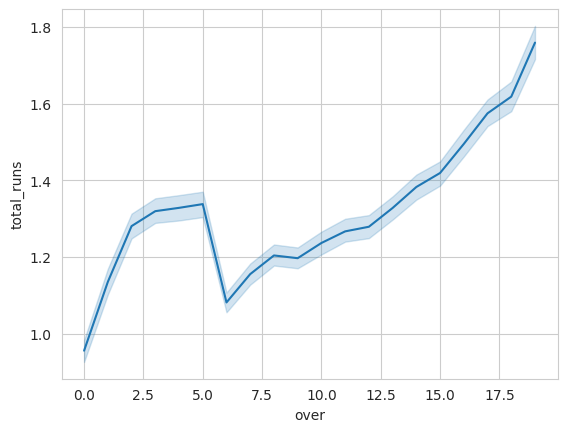

In [54]:
sbn.lineplot(x = df["over"], y = df["total_runs"])

Looking from an overall perspective of this line graph, there is a positive correlation can be seen between "over" and "total_runs" scored in that perticular over(It also suggests the correlation between "over" and "runrate") throughout the IPL. However, there are some other factors which affects this correlation such as:

After the 6th over, total_runs scored in 7th over declines dramatically. Because, "6-over" batting powerplay has just completed and now fielding restriction of powerplay are eliminated. After 17th over, there is an another downfall is detected in total_runs scored in perticular over. This might be caused by the "all-out" scenario and economic bowling spells in death overs.

In [55]:
pearsonr(df_wicket_over["over"], df_wicket_over["is_wicket"])

PearsonRResult(statistic=0.7863845771634496, pvalue=3.9312522463529606e-05)

<Axes: xlabel='over', ylabel='is_wicket'>

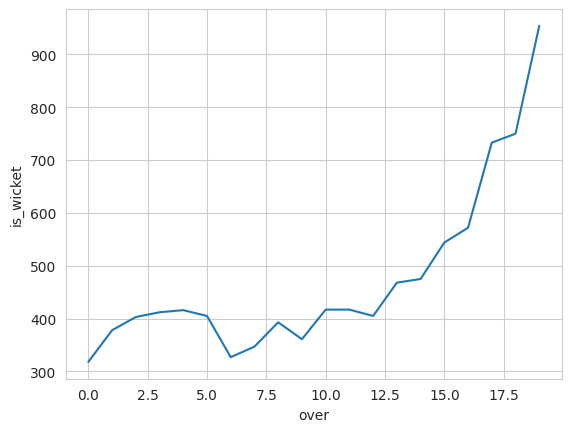

In [56]:
sbn.lineplot(x=df_wicket_over["over"], y=df_wicket_over["is_wicket"])

In [57]:
df_heatmap = df[['inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary','is_wicket']]
df_heatmap.corr()

,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
inning,1.000000,-0.046512,-0.003879,-0.007301,-0.000545,-0.007472,0.001463,-0.000998
over,-0.046512,1.000000,-0.006877,0.086966,-0.001303,0.087345,-0.001185,0.073788
ball,-0.003879,-0.006877,1.000000,0.007168,-0.002487,0.006693,-0.002156,0.004573
batsman_runs,-0.007301,0.086966,0.007168,1.000000,-0.140883,0.977587,0.019815,-0.170038
extra_runs,-0.000545,-0.001303,-0.002487,-0.140883,1.000000,0.070707,-0.001777,-0.041352
total_runs,-0.007472,0.087345,0.006693,0.977587,0.070707,1.000000,0.019587,-0.180115
non_boundary,0.001463,-0.001185,-0.002156,0.019815,-0.001777,0.019587,1.000000,-0.002066
is_wicket,-0.000998,0.073788,0.004573,-0.170038,-0.041352,-0.180115,-0.002066,1.000000


<Axes: >

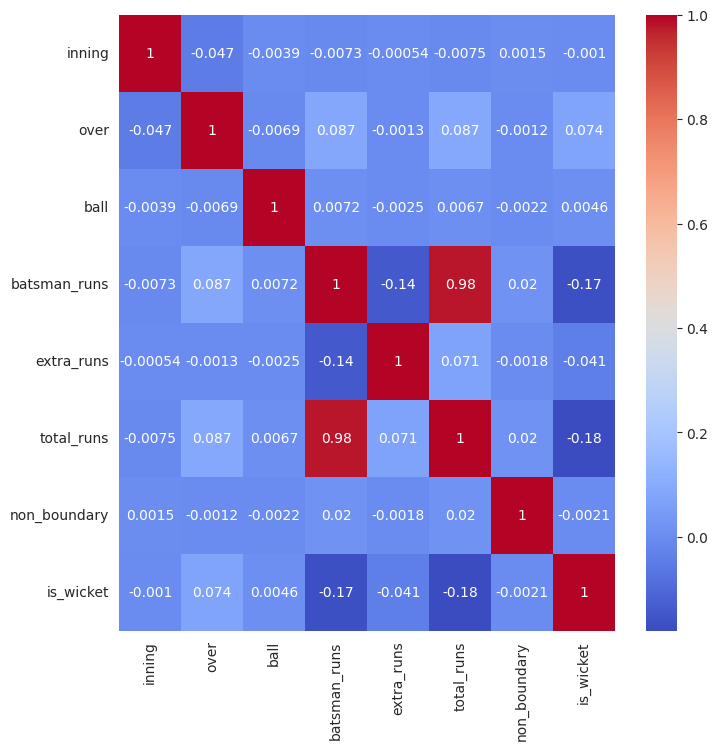

In [58]:
plt.figure(figsize=(8,8))
sbn.heatmap(df_heatmap.corr(),annot=True, cmap='coolwarm')

In [59]:
import seaborn as sns
sns.set_style("darkgrid")

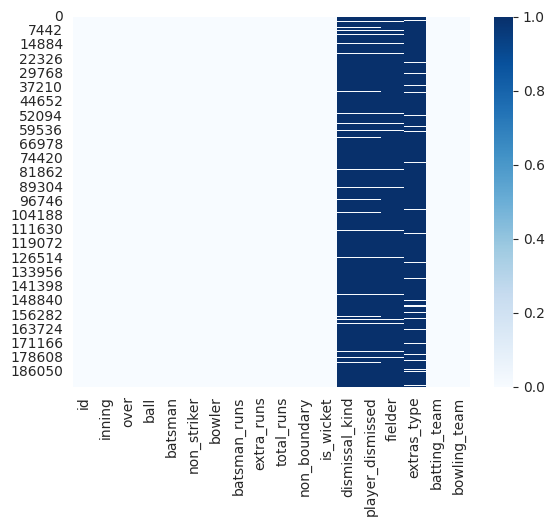

In [60]:
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

In [61]:
print("The percentage of null values in the columns consisting of null values:\n")
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("null rate of {} column: {}%".format(i,round(null_rate,3)))

The percentage of null values in the columns consisting of null values:

null rate of dismissal_kind column: 95.092%
null rate of player_dismissed column: 95.092%
null rate of fielder column: 96.493%
null rate of extras_type column: 94.711%
null rate of bowling_team column: 0.099%


# Regression, clustering, etc. ML problems

### K-means clustering

#### for 2-attributes ( scored runs, wickets taken )

In [62]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [63]:
df_player = df_player_data.copy()
df_player = df_player.query('(batting_innings > 10) | (bowling_innings > 10)')

df_player = df_player.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df_player

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W
0,V Kohli,184.0,163.0,5878.0,201.0,503.0,4496.0,113.0,5.0,39.0,130.738434,36.061350,26.0,370.0,4.0,251.0,2.0,0.0,0.0
1,SK Raina,189.0,160.0,5368.0,194.0,493.0,3914.0,100.0,1.0,38.0,137.148697,33.550000,69.0,1137.0,25.0,908.0,2.0,0.0,0.0
2,DA Warner,142.0,126.0,5254.0,195.0,510.0,3712.0,126.0,4.0,48.0,141.540948,41.698413,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,RG Sharma,194.0,177.0,5230.0,213.0,458.0,4004.0,109.0,1.0,39.0,130.619381,29.548023,30.0,448.0,15.0,332.0,4.0,1.0,0.0
4,S Dhawan,175.0,152.0,5197.0,108.0,591.0,4096.0,106.0,2.0,41.0,126.879883,34.190789,6.0,72.0,4.0,48.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,KK Ahmed,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,0.000000,17.0,575.0,27.0,381.0,3.0,0.0,0.0
524,YA Abdulla,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,11.0,311.0,15.0,209.0,4.0,2.0,0.0
532,IC Pandey,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,24.0,609.0,18.0,462.0,2.0,0.0,0.0
543,BW Hilfenhaus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,17.0,497.0,22.0,372.0,3.0,0.0,0.0


In [64]:
df_player.describe()

,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,36.837662,28.782468,749.003247,28.090909,68.275974,581.152597,50.207792,0.204545,3.899351,111.994735,18.830006,28.730519,747.532468,25.850649,558.331169,2.269481,0.389610,0.064935
std,40.580313,35.049078,1131.198121,46.466178,107.786880,850.023789,36.506423,0.699264,7.755187,32.005697,11.061543,33.756198,915.138395,33.989897,704.387858,1.676270,0.829518,0.271929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,6.000000,55.000000,1.000000,4.000000,61.750000,17.750000,0.000000,0.000000,97.883450,10.365789,1.000000,18.250000,0.000000,10.500000,0.000000,0.000000,0.000000
50%,20.000000,14.000000,270.000000,9.000000,21.500000,205.500000,42.000000,0.000000,0.000000,120.113339,18.215677,17.000000,418.500000,13.000000,298.000000,3.000000,0.000000,0.000000
75%,50.000000,38.000000,970.250000,36.250000,87.000000,744.750000,78.250000,0.000000,4.000000,132.124119,26.537745,40.500000,1084.250000,35.250000,785.000000,4.000000,1.000000,0.000000
max,194.000000,177.000000,5878.000000,349.000000,591.000000,4496.000000,175.000000,6.000000,48.000000,182.331731,88.000000,163.000000,4327.000000,170.000000,3374.000000,6.000000,6.000000,2.000000


Text(0, 0.5, 'Wickets')

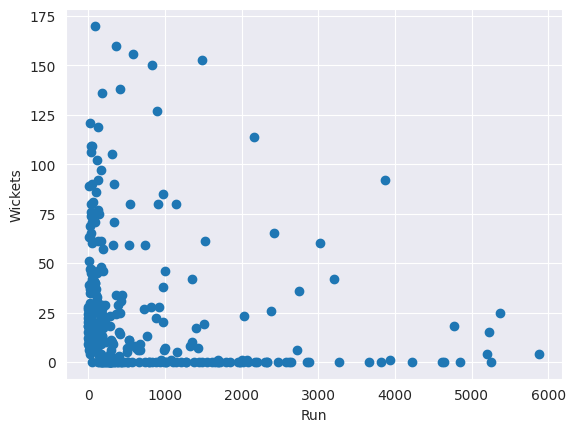

In [65]:
plt.scatter(df_player['scored_runs'],df_player['wickets_taken'])
plt.xlabel('Run')
plt.ylabel('Wickets')

In [66]:
df_player_km2 = df_player.loc[:,['scored_runs', 'wickets_taken']]

scaler = MinMaxScaler()

scaler.fit(df_player_km2[['scored_runs']])
df_player_km2['scored_runs'] = scaler.transform(df_player_km2[['scored_runs']])

scaler.fit(df_player_km2[['wickets_taken']])
df_player_km2['wickets_taken'] = scaler.transform(df_player_km2[['wickets_taken']])

In [67]:
df_player_km2.head()

,scored_runs,wickets_taken
0,1.000000,0.023529
1,0.913236,0.147059
2,0.893841,0.000000
3,0.889758,0.088235
4,0.884144,0.023529


Text(0, 0.5, 'Wickets')

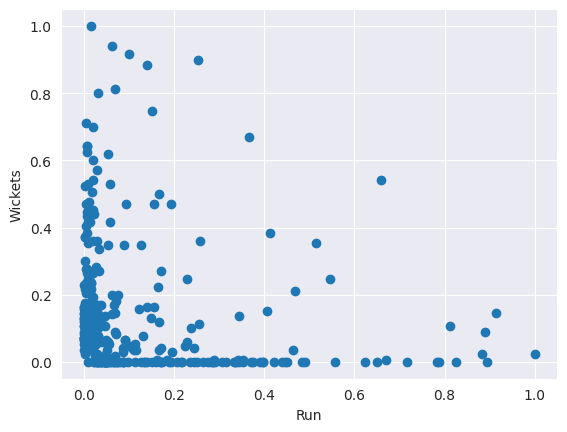

In [68]:
plt.scatter(df_player_km2['scored_runs'],df_player_km2['wickets_taken'])
plt.xlabel('Run')
plt.ylabel('Wickets')

In [69]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_player_km2[['scored_runs','wickets_taken']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

*   0 type: Batsman
*   1 type: Bowler
*   2 type: All rounder


In [70]:
df_player['player_type']=y_predicted
df_player

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W,player_type
0,V Kohli,184.0,163.0,5878.0,201.0,503.0,4496.0,113.0,5.0,39.0,130.738434,36.061350,26.0,370.0,4.0,251.0,2.0,0.0,0.0,2
1,SK Raina,189.0,160.0,5368.0,194.0,493.0,3914.0,100.0,1.0,38.0,137.148697,33.550000,69.0,1137.0,25.0,908.0,2.0,0.0,0.0,2
2,DA Warner,142.0,126.0,5254.0,195.0,510.0,3712.0,126.0,4.0,48.0,141.540948,41.698413,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2
3,RG Sharma,194.0,177.0,5230.0,213.0,458.0,4004.0,109.0,1.0,39.0,130.619381,29.548023,30.0,448.0,15.0,332.0,4.0,1.0,0.0,2
4,S Dhawan,175.0,152.0,5197.0,108.0,591.0,4096.0,106.0,2.0,41.0,126.879883,34.190789,6.0,72.0,4.0,48.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,KK Ahmed,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,0.000000,17.0,575.0,27.0,381.0,3.0,0.0,0.0,0
524,YA Abdulla,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,11.0,311.0,15.0,209.0,4.0,2.0,0.0,0
532,IC Pandey,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,24.0,609.0,18.0,462.0,2.0,0.0,0.0,0
543,BW Hilfenhaus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,17.0,497.0,22.0,372.0,3.0,0.0,0.0,0


In [71]:
km.cluster_centers_

array([[0.05823552, 0.0875481 ],
       [0.06061187, 0.54530663],
       [0.50927005, 0.05256571]])

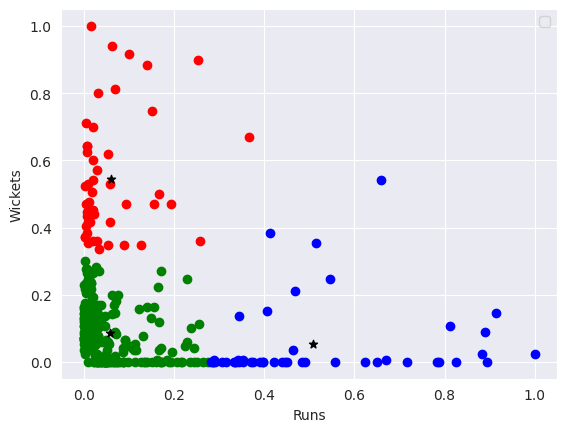

In [72]:
df_player_type_1 = df_player_km2[df_player.player_type==0]
df_player_type_2 = df_player_km2[df_player.player_type==1]
df_player_type_3 = df_player_km2[df_player.player_type==2]
plt.scatter(df_player_type_1.scored_runs,df_player_type_1.wickets_taken,color='green')
plt.scatter(df_player_type_2.scored_runs,df_player_type_2.wickets_taken,color='red')
plt.scatter(df_player_type_3.scored_runs,df_player_type_3.wickets_taken,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black', marker="*")
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.legend()

In [73]:
sse = []
k_rng = range(1,6)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df_player_km2[['scored_runs','wickets_taken']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

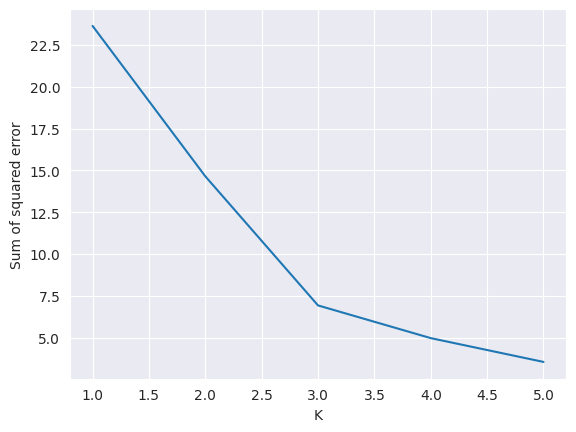

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [75]:
df_player

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W,player_type
0,V Kohli,184.0,163.0,5878.0,201.0,503.0,4496.0,113.0,5.0,39.0,130.738434,36.061350,26.0,370.0,4.0,251.0,2.0,0.0,0.0,2
1,SK Raina,189.0,160.0,5368.0,194.0,493.0,3914.0,100.0,1.0,38.0,137.148697,33.550000,69.0,1137.0,25.0,908.0,2.0,0.0,0.0,2
2,DA Warner,142.0,126.0,5254.0,195.0,510.0,3712.0,126.0,4.0,48.0,141.540948,41.698413,1.0,2.0,0.0,1.0,0.0,0.0,0.0,2
3,RG Sharma,194.0,177.0,5230.0,213.0,458.0,4004.0,109.0,1.0,39.0,130.619381,29.548023,30.0,448.0,15.0,332.0,4.0,1.0,0.0,2
4,S Dhawan,175.0,152.0,5197.0,108.0,591.0,4096.0,106.0,2.0,41.0,126.879883,34.190789,6.0,72.0,4.0,48.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,KK Ahmed,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,0.000000,17.0,575.0,27.0,381.0,3.0,0.0,0.0,0
524,YA Abdulla,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,11.0,311.0,15.0,209.0,4.0,2.0,0.0,0
532,IC Pandey,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,24.0,609.0,18.0,462.0,2.0,0.0,0.0,0
543,BW Hilfenhaus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,17.0,497.0,22.0,372.0,3.0,0.0,0.0,0


#### K-means Clustering for 7-attributes

In [76]:
df_player_km7 = df_player.loc[:,['scored_runs', 'wickets_taken', 'batting_innings', 'bowling_innings', 'high_score', 'best_spell', 'batting_avg']]

scaler.fit(df_player_km7[['scored_runs']])
df_player_km7['scored_runs'] = scaler.transform(df_player_km7[['scored_runs']])

scaler.fit(df_player_km7[['wickets_taken']])
df_player_km7['wickets_taken'] = scaler.transform(df_player_km7[['wickets_taken']])

scaler.fit(df_player_km7[['batting_innings']])
df_player_km7['batting_innings'] = scaler.transform(df_player_km7[['batting_innings']])

scaler.fit(df_player_km7[['bowling_innings']])
df_player_km7['bowling_innings'] = scaler.transform(df_player_km7[['bowling_innings']])

scaler.fit(df_player_km7[['high_score']])
df_player_km7['high_score'] = scaler.transform(df_player_km7[['high_score']])

scaler.fit(df_player_km7[['best_spell']])
df_player_km7['best_spell'] = scaler.transform(df_player_km7[['best_spell']])

scaler.fit(df_player_km7[['batting_avg']])
df_player_km7['batting_avg'] = scaler.transform(df_player_km7[['batting_avg']])

In [77]:
df_player_km7.head()

,scored_runs,wickets_taken,batting_innings,bowling_innings,high_score,best_spell,batting_avg
0,1.000000,0.023529,0.948454,0.159509,0.645714,0.333333,0.409788
1,0.913236,0.147059,0.974227,0.423313,0.571429,0.333333,0.381250
2,0.893841,0.000000,0.731959,0.006135,0.720000,0.000000,0.473846
3,0.889758,0.088235,1.000000,0.184049,0.622857,0.666667,0.335773
4,0.884144,0.023529,0.902062,0.036810,0.605714,0.166667,0.388532


In [78]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_player_km7)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [79]:
df_player['player_type']=y_predicted
df_player

,player,batting_innings,dismissals,scored_runs,sixes,fours,faced_balls,high_score,centuries,fifties,batting_strikerate,batting_avg,bowling_innings,runs_conceded,wickets_taken,bowled_balls,best_spell,4W,5W,player_type
0,V Kohli,184.0,163.0,5878.0,201.0,503.0,4496.0,113.0,5.0,39.0,130.738434,36.061350,26.0,370.0,4.0,251.0,2.0,0.0,0.0,0
1,SK Raina,189.0,160.0,5368.0,194.0,493.0,3914.0,100.0,1.0,38.0,137.148697,33.550000,69.0,1137.0,25.0,908.0,2.0,0.0,0.0,0
2,DA Warner,142.0,126.0,5254.0,195.0,510.0,3712.0,126.0,4.0,48.0,141.540948,41.698413,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0
3,RG Sharma,194.0,177.0,5230.0,213.0,458.0,4004.0,109.0,1.0,39.0,130.619381,29.548023,30.0,448.0,15.0,332.0,4.0,1.0,0.0,0
4,S Dhawan,175.0,152.0,5197.0,108.0,591.0,4096.0,106.0,2.0,41.0,126.879883,34.190789,6.0,72.0,4.0,48.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,KK Ahmed,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,0.000000,17.0,575.0,27.0,381.0,3.0,0.0,0.0,1
524,YA Abdulla,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,11.0,311.0,15.0,209.0,4.0,2.0,0.0,1
532,IC Pandey,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,0.000000,24.0,609.0,18.0,462.0,2.0,0.0,0.0,1
543,BW Hilfenhaus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,17.0,497.0,22.0,372.0,3.0,0.0,0.0,1


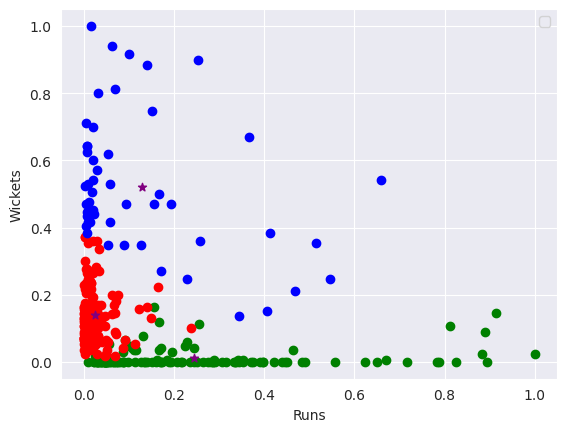

In [80]:
df_player_type_1 = df_player_km7[df_player.player_type==0]
df_player_type_2 = df_player_km7[df_player.player_type==1]
df_player_type_3 = df_player_km7[df_player.player_type==2]
plt.scatter(df_player_type_1.scored_runs,df_player_type_1.wickets_taken,color='green')
plt.scatter(df_player_type_2.scored_runs,df_player_type_2.wickets_taken,color='red')
plt.scatter(df_player_type_3.scored_runs,df_player_type_3.wickets_taken,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker="*")
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.legend()

In [81]:
SSE = []
k_range = range(1,6)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df_player_km7)
  SSE.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

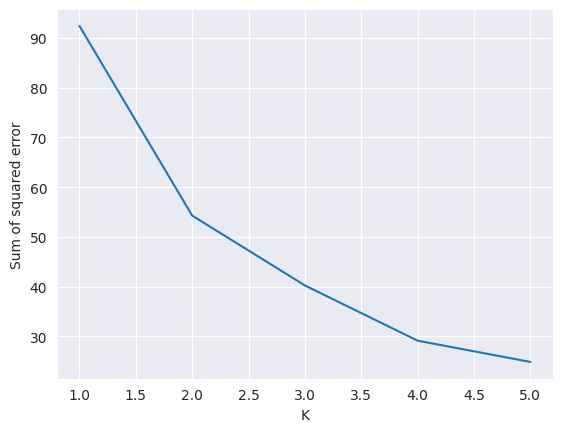

In [82]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,SSE)

## Regression Model

Dataframe for batsman data based on necessary parameters

In [83]:
batsman_group = df.groupby(['batsman'])

#Creating a data frame which contains the statistics for each batsman
df_batsman = pd.DataFrame(batsman_group['ball'].count()).rename(columns={'ball': 'balls_faced'})
df_batsman['innings'] = batsman_group['id'].nunique()
df_batsman['runs'] = batsman_group['batsman_runs'].sum()
df_batsman['num_4s'] = df[df['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()
df_batsman['num_4s'].fillna(0, inplace=True)
df_batsman['num_6s'] = df[df['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
df_batsman['num_6s'].fillna(0, inplace=True)

#Average for batsman
df_batsman['average_runs'] = round(df_batsman['runs']/df_batsman['innings'], 2)

#Strike rate for each batsman
df_batsman['strike_rate'] = round(df_batsman['runs']/df_batsman['balls_faced']*100, 2)

In [84]:
df_batsman['match_runs'] = df.groupby('id').tail(5).groupby('batsman').sum()['batsman_runs']/5
df_batsman['match_runs'].fillna(0, inplace=True)

<ipython-input-84-7d51da580691>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [85]:
#100s scored
temp = df.groupby(['batsman','id']).sum()['batsman_runs'].reset_index()
df_batsman['100s'] = temp[temp['batsman_runs'] >= 100].groupby('batsman')['batsman_runs'].count()
df_batsman['100s'].fillna(0, inplace=True)

#50s scored
df_batsman['50s'] = temp[temp['batsman_runs']>=50].groupby('batsman')['batsman_runs'].count()
df_batsman['50s'].fillna(0, inplace=True)

df_batsman = df_batsman[df_batsman['innings'] > df_batsman['innings'].mean()]
df_batsman.head()

<ipython-input-85-f95e66d11d96>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,balls_faced,innings,runs,num_4s,num_6s,average_runs,strike_rate,match_runs,100s,50s
batsman,,,,,,,,,,
A Ashish Reddy,196,23,280,16.0,15.0,12.17,142.86,2.2,0.0,0.0
A Mishra,410,54,362,29.0,5.0,6.70,88.29,5.2,0.0,0.0
A Symonds,781,36,974,74.0,41.0,27.06,124.71,2.4,1.0,6.0
AB de Villiers,3264,156,4849,390.0,235.0,31.08,148.56,20.8,3.0,41.0
AC Gilchrist,1555,80,2069,239.0,92.0,25.86,133.05,3.4,2.0,13.0


### Linear Regression

Predicting runs of a player from past performances in future


*   Features for training : Batsman id, balls_faced, innings, runs, num of 4s, num of 6s, average runs, strike rates, centuries, half centuries
*   Target variable: Runs in future matches



#### Implicit parameter values


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing

independent = df_batsman.drop('match_runs', axis=1) #dropping the match_runs column as we will predict it
target = df_batsman['match_runs']

x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size=0.20, random_state=45)

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

lin = LinearRegression()
lin.fit(x_train, y_train)

#finding m and c
print("c intercept:", lin.intercept_)
print("m coefficient:", lin.coef_)

y_predicted = lin.predict(x_test)
score = r2_score(y_test, y_predicted)
print("r2 score:", score)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("rmse:", rmse)

c intercept: 6.216666666666669
m coefficient: [-5.15355332 -1.2641461  21.04631854 -6.44175197 -0.90929537 -0.41632607
  0.19795624 -0.62823182 -3.28985248]
r2 score: 0.6973490458937246
rmse: 3.8862435258395065


In [87]:
lin.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LinearRegression

pipe = make_pipeline(StandardScaler(), LinearRegression())
parameters = {
              "linearregression__fit_intercept": [True, False],
             }
grid = GridSearchCV(estimator=pipe, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False]})

In [89]:
grid.best_params_

{'linearregression__fit_intercept': True}

#### Linear Regression with Gradient descent

In [90]:
from sklearn.linear_model import SGDClassifier
y=y_train.astype('int')

grad_des_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
grad_des_clf.fit(x_train, y)

SGDClassifier(max_iter=100)

In [91]:
print(grad_des_clf.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 100, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


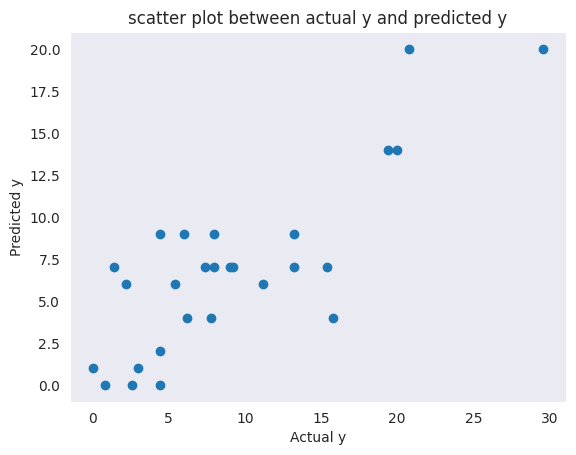

Mean Squared Error : 22.03703703703704
Mean Absolute Error : 3.740740740740741


In [92]:
y_pred = grad_des_clf.predict(x_test)
plt.scatter(y_test, y_pred)
plt.grid()

plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))

#### Gradient descent with custom parameter values

In [93]:
grad_des_clf1 = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
grad_des_clf1.set_params(alpha = 0.000001)
grad_des_clf1.fit(x_train, y)

SGDClassifier(alpha=1e-06, max_iter=100)

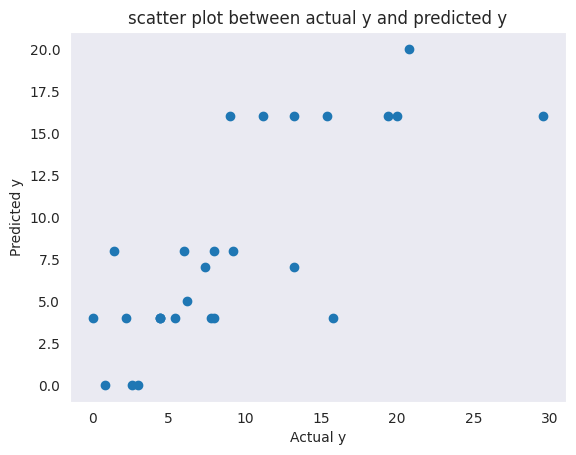

Mean Squared Error : 21.85925925925926
Mean Absolute Error : 3.2962962962962963


In [94]:
plt.scatter(y_test, grad_des_clf1.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, grad_des_clf1.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, grad_des_clf1.predict(x_test)))

#### Ridge regression

In [95]:
from sklearn.linear_model import Ridge

#Create an instance of the class.

RR= Ridge(alpha=1.0) # Regularization parameter
#Fit the instance on the data and then predict the expected value.
RR= RR.fit(x_train, y)
print(RR.get_params())
y_predict= RR.predict(x_test)

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [96]:
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(RR, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(x_train,y)
Ridge_GS.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'solver': 'lsqr'}

In [97]:
y_predict

array([ 2.15624439,  2.34123535,  5.26188209,  5.01019761,  9.87161986,
       17.90145386,  7.2667877 ,  9.02811259, 18.56682848, 17.93083618,
        3.06923362,  1.65752603,  6.87322711,  9.95355833,  2.94826095,
        4.13192004,  9.56494596, 13.20065364,  6.04574023,  4.14144857,
       15.46182235,  1.99040088,  5.55483361, 19.18820407,  8.8875216 ,
        6.19757364,  2.97001898])

In [98]:
RR.set_params(alpha = 2.0)

# Fit again if we want
RR.fit(x_train, y)

# Print out the current params
print(RR.get_params())

{'alpha': 2.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [99]:
y_predict

array([ 2.15624439,  2.34123535,  5.26188209,  5.01019761,  9.87161986,
       17.90145386,  7.2667877 ,  9.02811259, 18.56682848, 17.93083618,
        3.06923362,  1.65752603,  6.87322711,  9.95355833,  2.94826095,
        4.13192004,  9.56494596, 13.20065364,  6.04574023,  4.14144857,
       15.46182235,  1.99040088,  5.55483361, 19.18820407,  8.8875216 ,
        6.19757364,  2.97001898])

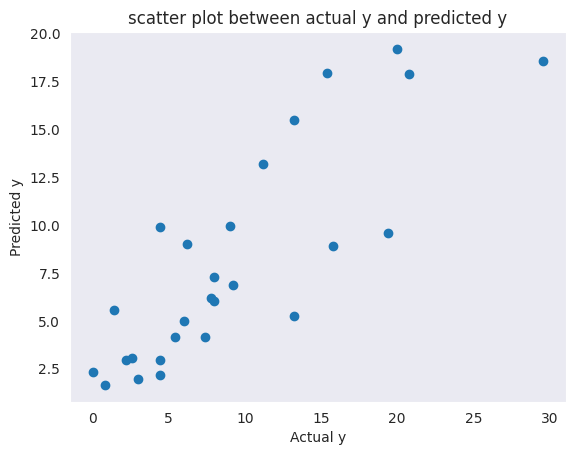

Mean Squared Error : 16.688437631896377
Mean Absolute Error : 2.9949369372982053


In [100]:
plt.scatter(y_test, y_predict)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error :',mean_absolute_error(y_test, y_predict))

Different losses with all the regression models:

1. Linear regression implicit params: 3.88
2. Linear regression with gradient descent: 28.31
3. Linear regrssion with custom gradient descent: 36.60
4. Ridge regression: 16.68